# Swanalytics - Churn Analysis

## Data & Notebook Setup

In [1]:
## Import the 4 main data analysis libraries

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

## Import some modules from sklearn for predictive modelling

from sklearn.model_selection import train_test_split     # splitting the data
from sklearn import metrics                              # metrics for assessing the models success / impact 
from sklearn.linear_model import LogisticRegression      # logistic regression model


In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/gdiwa23/Swanalytics/refs/heads/main/1%20Project%20Data%20-%20Telco_Churn.csv')     # read in the dataset

## Data Cleaning -> Feature Engineering

In [3]:
df.shape     # check the number of rows and columns of the dataset

(7043, 31)

In [4]:
df.head()    # check the first few rows

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,...,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,...,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,...,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,...,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,...,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,Competitor had better devices


In [5]:
df.tail()    # check the last few rows

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Reason
7038,2569-WGERO,1,United States,California,Landers,92285,"34.341737, -116.539416",34.341737,-116.539416,Female,...,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),21.15,1419.4,No,0,NaN
7039,6840-RESVB,1,United States,California,Adelanto,92301,"34.667815, -117.536183",34.667815,-117.536183,Male,...,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No,0,NaN
7040,2234-XADUH,1,United States,California,Amboy,92304,"34.559882, -115.637164",34.559882,-115.637164,Female,...,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No,0,NaN
7041,4801-JZAZL,1,United States,California,Angelus Oaks,92305,"34.1678, -116.86433",34.167800,-116.864330,Female,...,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No,0,NaN
7042,3186-AJIEK,1,United States,California,Apple Valley,92308,"34.424926, -117.184503",34.424926,-117.184503,Male,...,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No,0,NaN


In [6]:
df.info()    # check some summary info - including nulls and datatypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 31 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerID         7043 non-null   object 
 1   Count              7043 non-null   int64  
 2   Country            7043 non-null   object 
 3   State              7043 non-null   object 
 4   City               7043 non-null   object 
 5   Zip Code           7043 non-null   int64  
 6   Lat Long           7043 non-null   object 
 7   Latitude           7043 non-null   float64
 8   Longitude          7043 non-null   float64
 9   Gender             7043 non-null   object 
 10  Senior Citizen     7043 non-null   object 
 11  Partner            7043 non-null   object 
 12  Dependents         7043 non-null   object 
 13  Tenure Months      7043 non-null   int64  
 14  Phone Service      7043 non-null   object 
 15  Multiple Lines     7043 non-null   object 
 16  Internet Service   7043 

In [7]:
# quick check for any duplicated rows

print(f'There are no duplicated rows in the dataframe: {df.shape == df.drop_duplicates().shape}')

There are no duplicated rows in the dataframe: True


In [8]:
df.isnull().sum() / len(df) * 100     # check the percentage of nulls in each column of the dataframe

CustomerID            0.000000
Count                 0.000000
Country               0.000000
State                 0.000000
City                  0.000000
Zip Code              0.000000
Lat Long              0.000000
Latitude              0.000000
Longitude             0.000000
Gender                0.000000
Senior Citizen        0.000000
Partner               0.000000
Dependents            0.000000
Tenure Months         0.000000
Phone Service         0.000000
Multiple Lines        0.000000
Internet Service      0.000000
Online Security       0.000000
Online Backup         0.000000
Device Protection     0.000000
Tech Support          0.000000
Streaming TV          0.000000
Streaming Movies      0.000000
Contract              0.000000
Paperless Billing     0.000000
Payment Method        0.000000
Monthly Charges       0.000000
Total Charges         0.000000
Churn Label           0.000000
Churn Value           0.000000
Churn Reason         73.463013
dtype: float64

> Since there are nulls in the `Churn Reason` column - we checked the contents of this column to decide how to proceed...
> * as expected from the column name - these are basically the reasons for customers leaving.
> * for all the customers who haven't left, we have no information here - since there can be no reason for leaving, if they haven't left.
> * for the actual values - the most common reason has only 192 entries (out of a total of over 7000) so we decide that we will not use this in the models.
> * however, it is useful information which we may refer back to at a later stage.

In [9]:
df['Churn Reason'].head()

0     Competitor made better offer
1                            Moved
2                            Moved
3                            Moved
4    Competitor had better devices
Name: Churn Reason, dtype: object

In [10]:
df['Churn Reason'].value_counts()

Churn Reason
Attitude of support person                   192
Competitor offered higher download speeds    189
Competitor offered more data                 162
Don't know                                   154
Competitor made better offer                 140
Attitude of service provider                 135
Competitor had better devices                130
Network reliability                          103
Product dissatisfaction                      102
Price too high                                98
Service dissatisfaction                       89
Lack of self-service on Website               88
Extra data charges                            57
Moved                                         53
Limited range of services                     44
Long distance charges                         44
Lack of affordable download/upload speed      44
Poor expertise of phone support               20
Poor expertise of online support              19
Deceased                                       6
Name: c

In [11]:
df.dtypes     # check the datatypes for each column

CustomerID            object
Count                  int64
Country               object
State                 object
City                  object
Zip Code               int64
Lat Long              object
Latitude             float64
Longitude            float64
Gender                object
Senior Citizen        object
Partner               object
Dependents            object
Tenure Months          int64
Phone Service         object
Multiple Lines        object
Internet Service      object
Online Security       object
Online Backup         object
Device Protection     object
Tech Support          object
Streaming TV          object
Streaming Movies      object
Contract              object
Paperless Billing     object
Payment Method        object
Monthly Charges      float64
Total Charges         object
Churn Label           object
Churn Value            int64
Churn Reason          object
dtype: object

> When checking the datatypes - we identified that a number of columns contain non-numeric features. The problem is that if we are using a **linear regression** model - which we intend to, we can only use numerical features for the model. So we decide that we will convert these into numeric datatypes whilst trying to maintain the same level of information. In addition to this, we also decided to drop some columns since they do not tell us any additional information which we can use in our models...
> * **Drop the following**: `Count` is 1 for every column / `Country` is always United States / `State` is always California / `Lat Long` contains the same information as latitude and longitude columns / `Churn Label` is the same informations as `Churn Value` / `City` has too many unique values for our model to work effectively with / `Churn Reason` is non-numeric and has too many values.
>
> 
> * **Convert to numerical**: `Gender` / `Senior Citizen` / `Partner` / `Dependents` / `Phone Service` / `Multiple Lines` / `Internet Service` / `Online Security` / `Online Backup` / `Device Protection` / `Tech Support` / `Streaming TV` / `Streaming Movies` / `Contract` / `Paperless Billing` / `Payment Method` need to be encoded to numerical datatypes - these are shown in our data cleaning/feature engineering function `clean_data()`.
>
> 
> * **Assess and convert to numerical**: We were unsure why `Total Charges` was not numerical since they are bound to be numbers (an amount of money) - we tried to convert this to a numeric datatype - and when we did so, some values appeared as nulls - on further investigation, we identified that these are all customers with 0 months of tenure and so it seems like they wouldn't have paid anything yet; therefore, we fill these with zeros.
>
> 
> * **CustomerID**: Since this is a unique identifier - we decided to set this as the index of our dataframe - so that we could still refer to it, however it is not in a standard column of the dataframe as a string / object datatype.

In [12]:
# Total Charges - change to numeric and fill nulls

df['Total Charges'] = pd.to_numeric(df['Total Charges'], errors='coerce')                       # casts to float
df['Total Charges'] = df['Total Charges'].fillna(0)                                             # fill null values with zero since they have 0 months of tenure - so haven't paid anything yet
print(f"No more nulls in 'Total Charges' column: {df['Total Charges'].isnull().sum() == 0}")    # check that there are no more nulls

No more nulls in 'Total Charges' column: True


In [13]:
df.set_index('CustomerID', inplace=True)

In [14]:
df = df.drop(columns=["Count","City","Country","State","Lat Long","Churn Label","Churn Reason"])

In [15]:
## This function cleans the data so that it is ready to use for modelling
## Includes: One Hot Encoding for Internet Service, Contract and Payment Method as well as other encoding for a number of columns

def clean_data(df):
    df_clean = df.copy()     # Create a copy of the dataframe to not change the global dataframe we started with

# OHE the service column into Fibre Optic or DSL - 0 in both indicates no internet service

    df_clean = pd.get_dummies(df_clean, columns = ['Internet Service'], drop_first = True, prefix = 'Service', dtype = int)
    df_clean = pd.get_dummies(df_clean, columns = ['Contract'], drop_first = True, prefix = 'Contract', dtype = int)
    df_clean = pd.get_dummies(df_clean, columns=['Payment Method'], drop_first=True, prefix='Payment_Method', dtype=int)

# Label Encoding - since 'Internet Service' and 'Phone Service' are already included -> other columns which refer to these encode 'no service' to 0 [along with 'no']
# For example, people no internet service -> implies they cannot have internet backup -> so both 'No' and 'No internet service' are encoded to 0

    df_clean['Gender'] = df_clean['Gender'].map({'Female': 0, 'Male':1, 0:0, 1:1})
    df_clean['Senior Citizen'] = df_clean['Senior Citizen'].map({'No': 0, 'Yes':1, 0:0, 1:1})
    df_clean['Partner'] = df_clean['Partner'].map({'No': 0, 'Yes':1, 0:0, 1:1})
    df_clean['Dependents'] =  df_clean['Dependents'].map({'No': 0, 'Yes':1, 0:0, 1:1})
    df_clean['Phone Service'] = df_clean['Phone Service'].map({'No': 0, 'Yes':1, 0:0, 1:1})
    df_clean['Multiple Lines'] = df_clean['Multiple Lines'].map({'No': 0, 'Yes':1,'No phone service':0, 0:0, 1:1})
    df_clean['Online Security'] = df_clean['Online Security'].map({'No':0, 'Yes':1, 'No internet service':0, 0:0, 1:1})
    df_clean['Online Backup'] = df_clean['Online Backup'].map({'No':0, 'Yes':1, 'No internet service':0, 0:0, 1:1})
    df_clean['Device Protection'] = df_clean['Device Protection'].map({'No':0, 'Yes':1, 'No internet service':0, 0:0, 1:1})
    df_clean['Tech Support'] = df_clean['Tech Support'].map({'No':0, 'Yes':1, 'No internet service':0, 0:0, 1:1})
    df_clean['Streaming TV'] = df_clean['Streaming TV'].map({'No':0, 'No internet service':0, 'Yes':1, 0:0, 1:1})
    df_clean['Streaming Movies'] = df_clean['Streaming Movies'].map({'No':0, 'No internet service':0, 'Yes':1, 0:0, 1:1})
    df_clean['Paperless Billing'] = df_clean['Paperless Billing'].map({'No': 0, 'Yes':1, 0:0, 1:1})

    return df_clean

## Train-Test Split

In [18]:
feature_cols = df.columns.drop('Churn Value')
feature_cols

Index(['Zip Code', 'Latitude', 'Longitude', 'Gender', 'Senior Citizen',
       'Partner', 'Dependents', 'Tenure Months', 'Phone Service',
       'Multiple Lines', 'Internet Service', 'Online Security',
       'Online Backup', 'Device Protection', 'Tech Support', 'Streaming TV',
       'Streaming Movies', 'Contract', 'Paperless Billing', 'Payment Method',
       'Monthly Charges', 'Total Charges'],
      dtype='object')

In [19]:
X = df[feature_cols].copy()
y = df['Churn Value']

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size = 0.2,
                                                    random_state = 1)

In [24]:
# Completed a few sanity checks to confirm that the features and the targets match as expected after this split

print(f'Train length match: {len(X_train)==len(y_train)}')
print(f'Test length match: {len(X_test)==len(y_test)}')
print(f'Train index match: {all(X_train.index == y_train.index)}')
print(f'Test index match: {all(X_test.index == y_test.index)}')

Train length match: True
Test length match: True
Train index match: True
Test index match: True


## Further EDA on Training Set - to inform modelling

> Now that we have out training set, we can be explore the data in more detail without fear of data leakage. The following visualisations use the data from the training set, so that the test set is effectively still "unseen" at this stage and is not informing our actions in any way. This would be especially important if we were to perform any data dependent operations - but for the most part this is exploratory anyway.

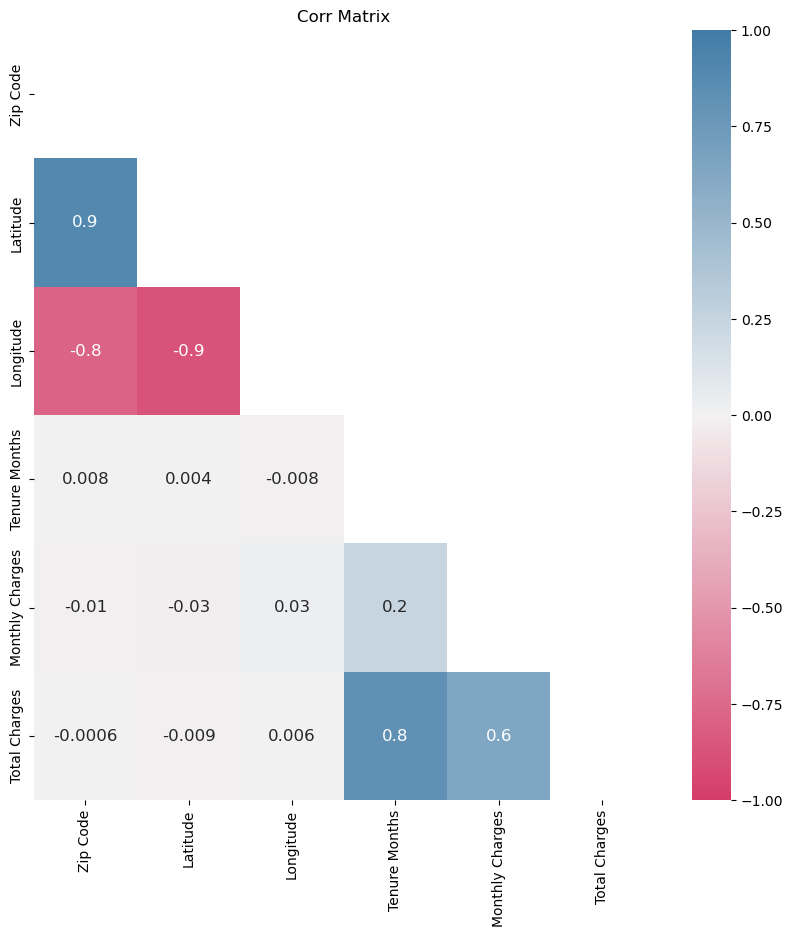

In [25]:
plt.figure(figsize=(10, 10))

sns.heatmap(X_train.corr(numeric_only=True),
            annot=True,
            fmt='.1',
            cmap=sns.diverging_palette(0, 240, as_cmap=True),
            vmin=-1,
            vmax=1,
            mask=np.triu(X_train.corr(numeric_only=True)),
            annot_kws={"size": 12})

plt.title('Corr Matrix')
plt.show()

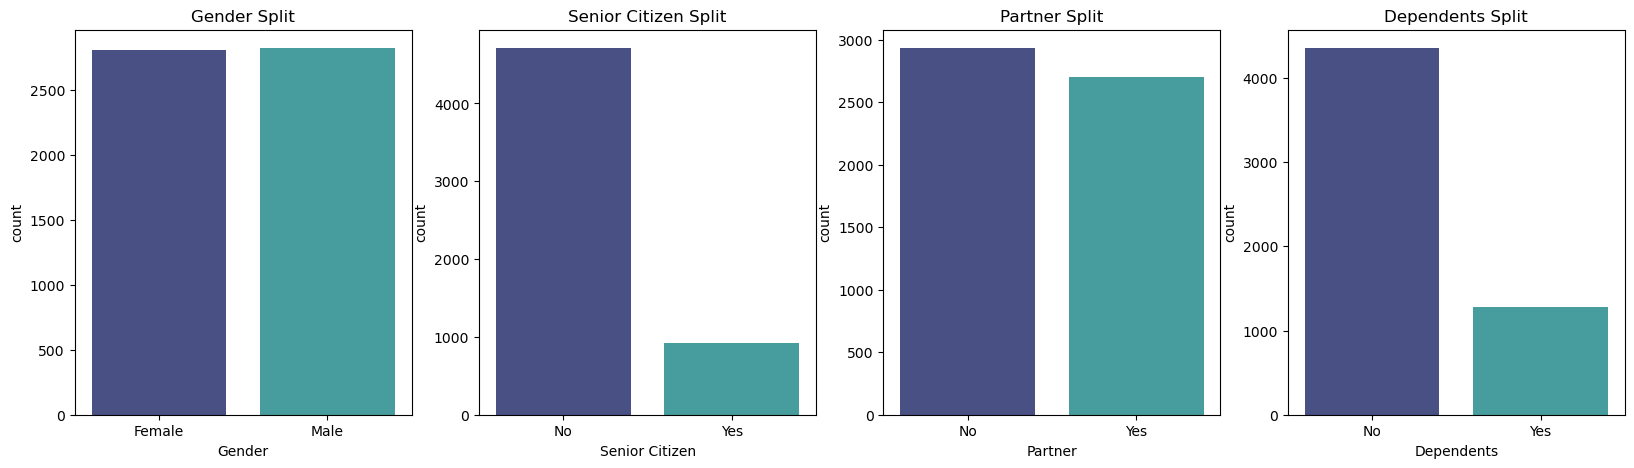

In [27]:
fig, axes = plt.subplots(1, 4, figsize=(20, 5)) # arrange subplots in 1 row, 4 columns

# this uses tuple unpacking to "unpack" the objects from plt.subplots since it returns two things
# it gives us access to both of these objects (the figure itself and the set of axes) for further use

sns.countplot(data=X_train, x='Gender', palette="mako", hue='Gender', ax=axes[0])
axes[0].set_title('Gender Split')

sns.countplot(data=X_train, x='Senior Citizen', palette="mako", hue='Senior Citizen', ax=axes[1])
axes[1].set_title('Senior Citizen Split')

sns.countplot(data=X_train, x='Partner', palette="mako", hue='Partner', ax=axes[2])
axes[2].set_title('Partner Split')

sns.countplot(data=X_train, x='Dependents', palette="mako", hue='Dependents', ax=axes[3])
axes[3].set_title('Dependents Split')

plt.show()

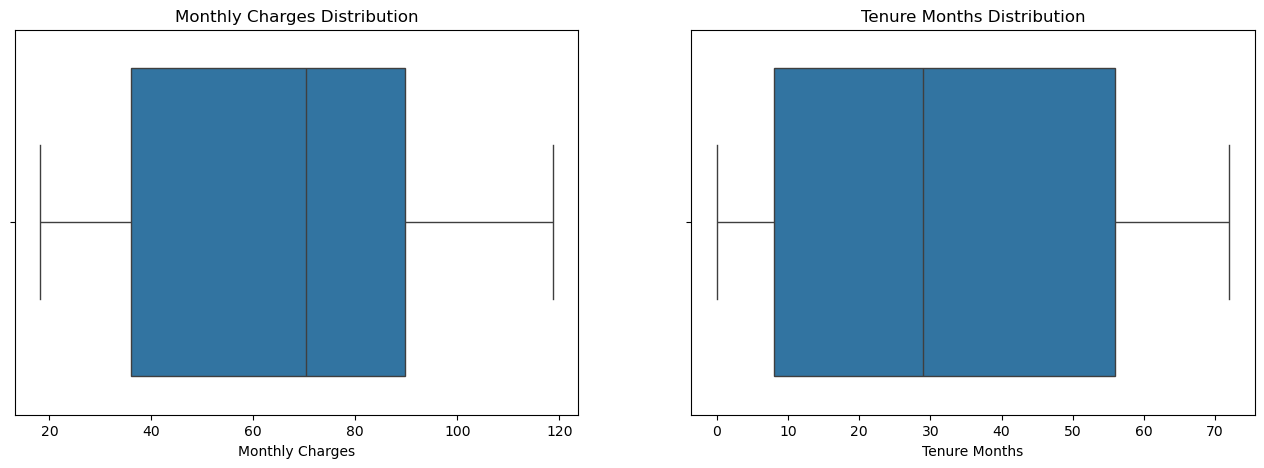

In [28]:
fig, axes = plt.subplots(1, 2, figsize=(16, 5)) # arrange subplots in 1 row, 2 columns

sns.boxplot(data = X_train, x = 'Monthly Charges', ax=axes[0])
axes[0].set_title('Monthly Charges Distribution')

sns.boxplot(data = X_train, x = 'Tenure Months', ax=axes[1])
axes[1].set_title('Tenure Months Distribution')

plt.show()

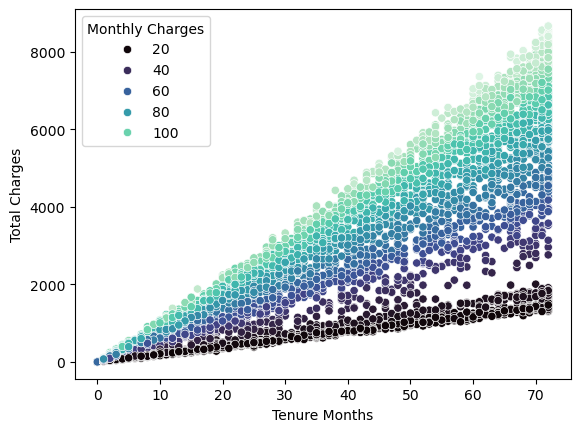

In [29]:
sns.scatterplot(data=X_train, x='Tenure Months', y='Total Charges', palette='mako', hue='Monthly Charges', legend='auto')
plt.show()

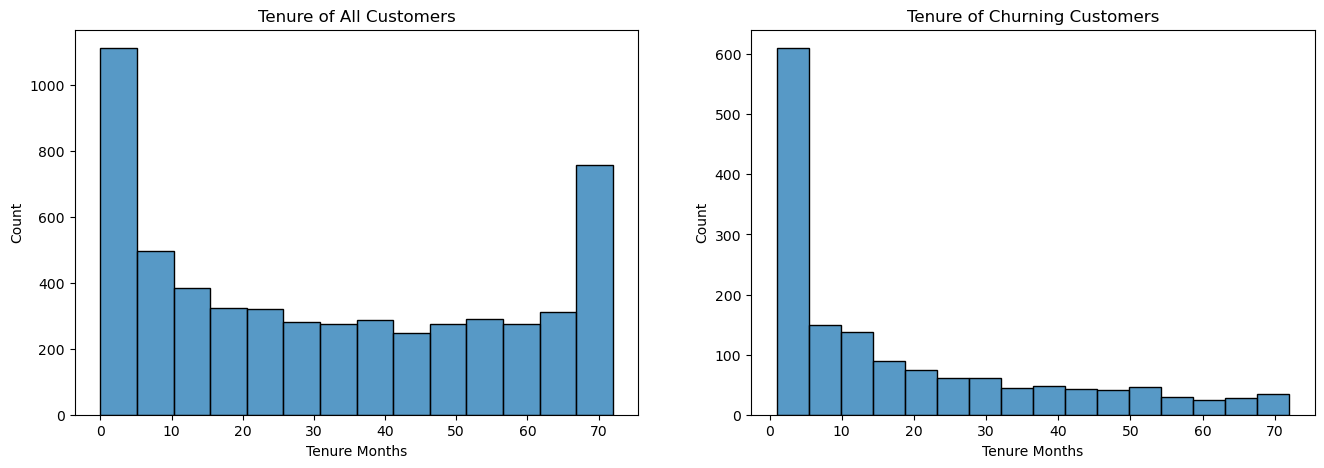

In [33]:
training_set = pd.concat([X_train, y_train], axis=1)

fig, axes = plt.subplots(1, 2, figsize=(16, 5)) # arrange subplots in 1 row, 2 columns

sns.histplot(data = training_set, x = 'Tenure Months', ax=axes[0])
axes[0].set_title('Tenure of All Customers')

churn_customers = training_set.loc[training_set['Churn Value'] == 1]
sns.histplot(data = churn_customers, x = 'Tenure Months', ax=axes[1])
axes[1].set_title('Tenure of Churning Customers')

plt.show()

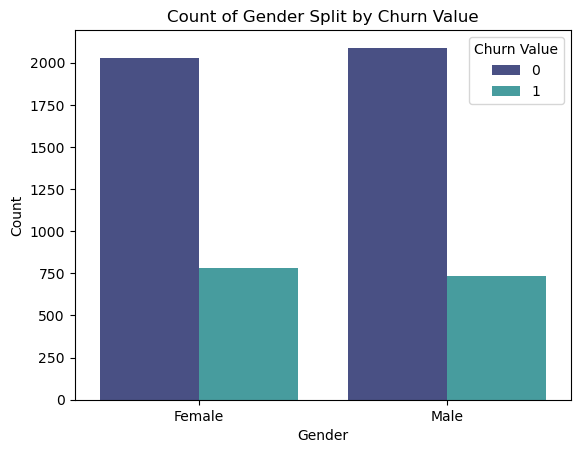

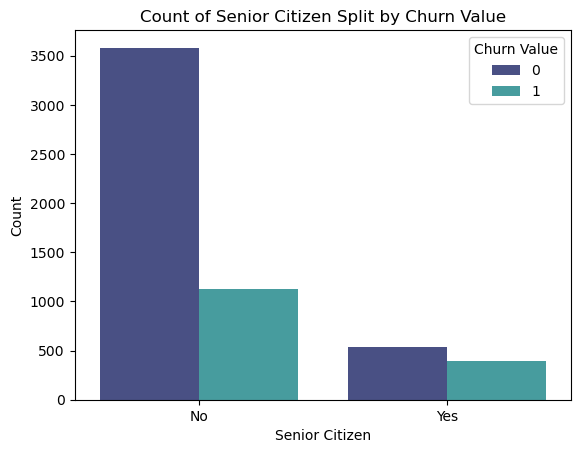

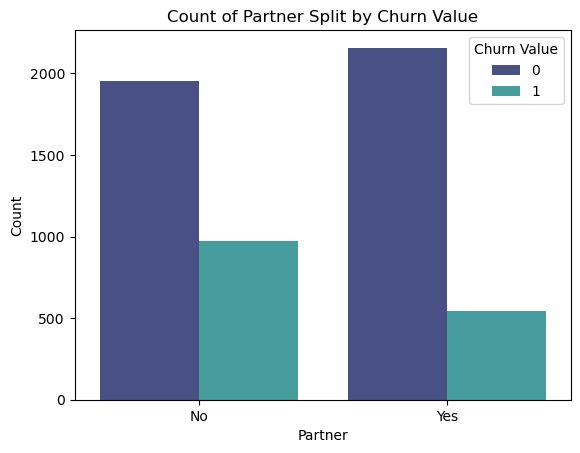

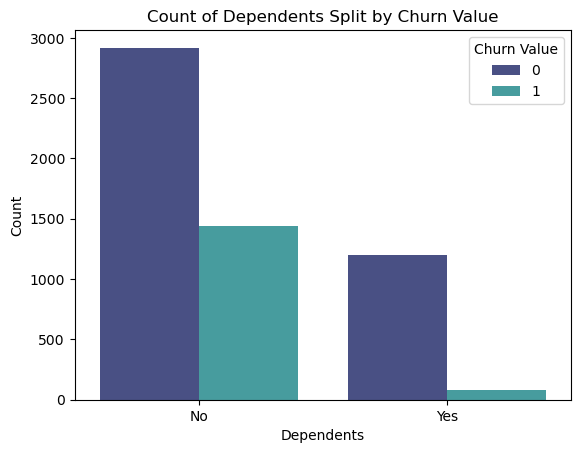

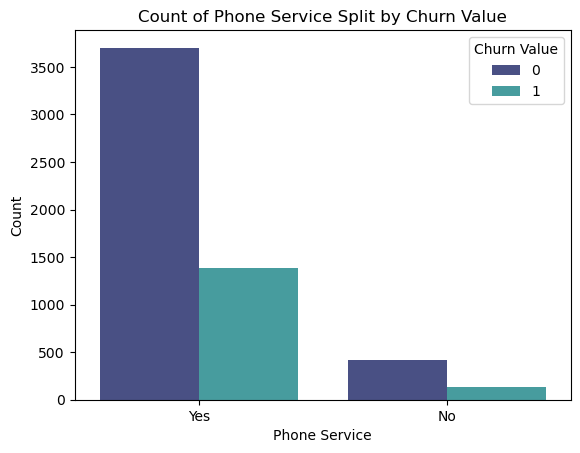

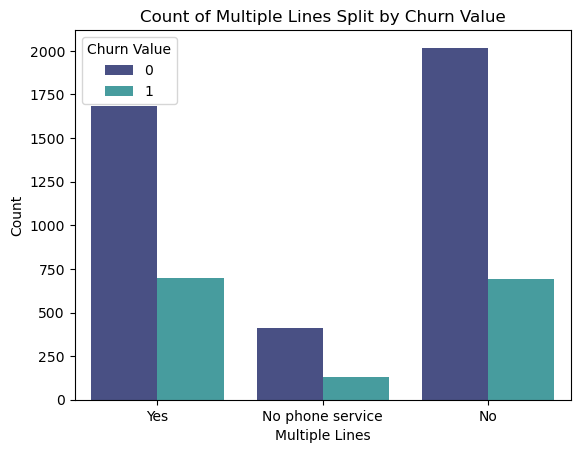

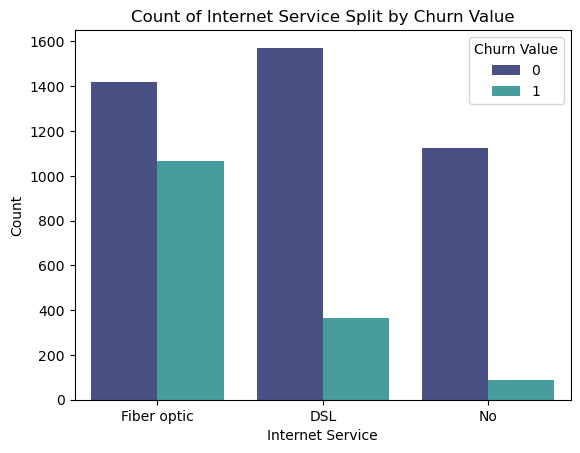

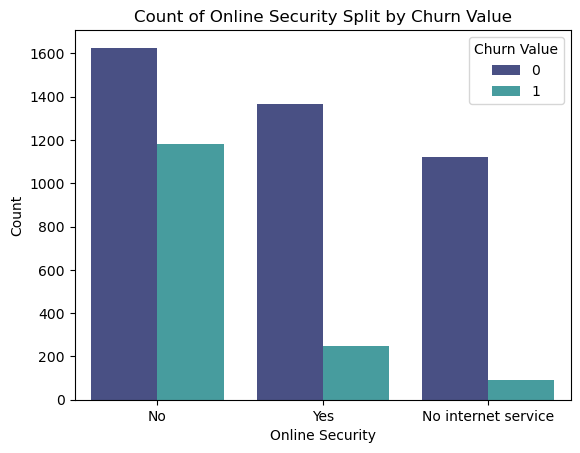

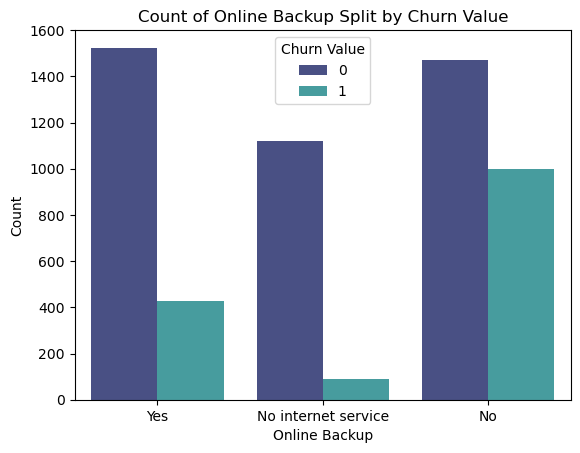

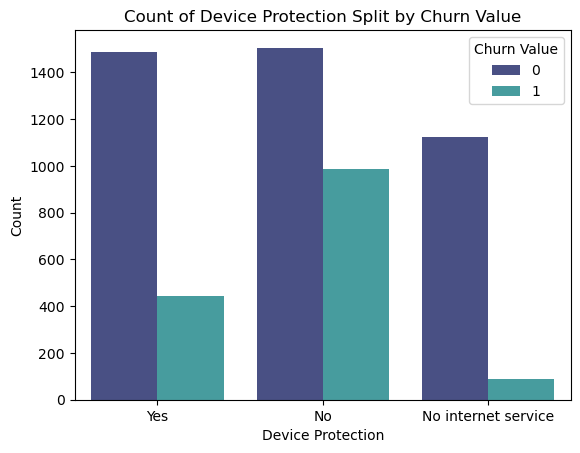

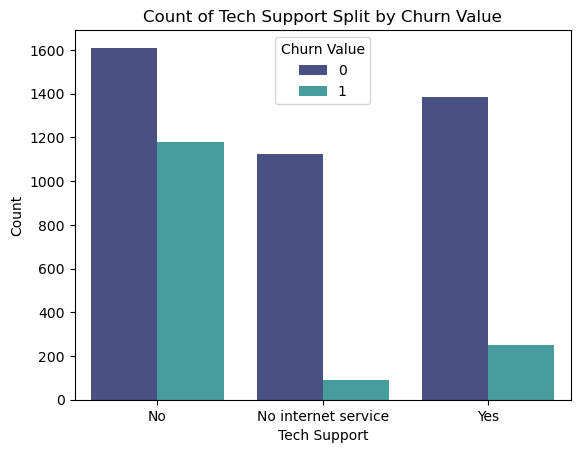

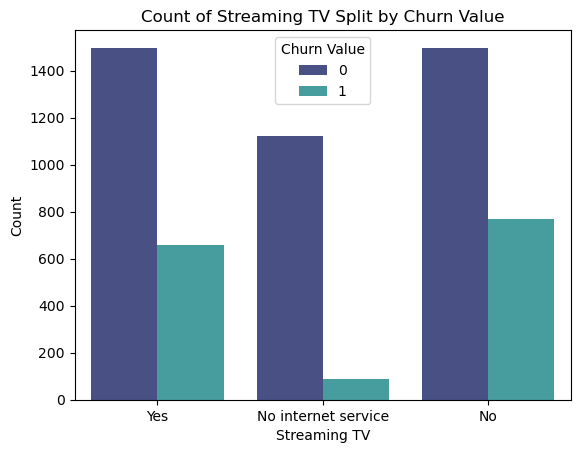

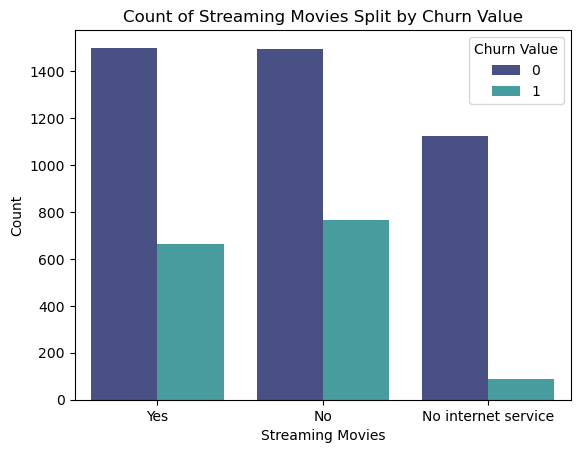

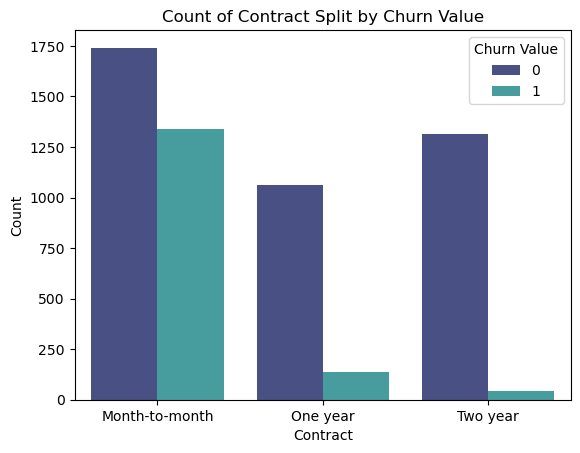

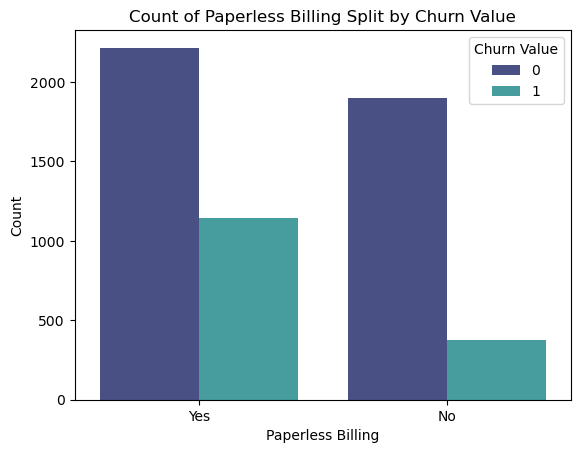

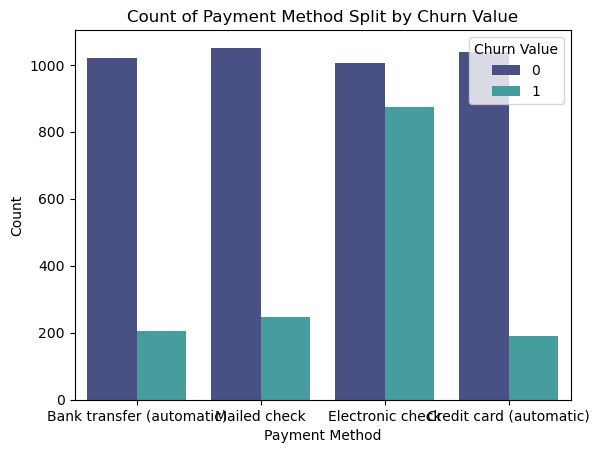

In [34]:
discrete_col_list = ['Gender', 'Senior Citizen', 'Partner', 'Dependents',
                  'Phone Service', 'Multiple Lines', 'Internet Service', 'Online Security',
                  'Online Backup', 'Device Protection', 'Tech Support', 'Streaming TV', 'Streaming Movies',
                  'Contract', 'Paperless Billing', 'Payment Method']

for my_column in training_set[discrete_col_list]:
    sns.countplot(x=my_column, hue="Churn Value", data=training_set, palette='mako')
    plt.title(f'Count of {my_column} Split by Churn Value')
    plt.xlabel(my_column)
    plt.ylabel('Count')
    plt.show()

## Feature Engineering the Training Set

In [35]:
X_train_fe = clean_data(X_train)

In [36]:
X_train_fe.head()

,Zip Code,Latitude,Longitude,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,...,Paperless Billing,Monthly Charges,Total Charges,Service_Fiber optic,Service_No,Contract_One year,Contract_Two year,Payment_Method_Credit card (automatic),Payment_Method_Electronic check,Payment_Method_Mailed check
CustomerID,,,,,,,,,,,,,,,,,,,,,
0402-CQAJN,91732,34.074492,-118.014620,0,0,0,0,37,1,1,...,1,101.90,3545.35,1,0,0,0,0,0,0
2137-DQMEV,92780,33.735802,-117.818805,1,0,1,1,68,0,0,...,0,44.80,2983.65,0,0,1,0,0,0,1
4636-TVXVG,94973,38.005839,-122.638155,1,0,1,1,62,1,0,...,0,19.95,1244.80,0,1,1,0,0,0,0
2480-JZOSN,93287,35.710244,-118.881679,0,0,1,0,1,1,0,...,1,20.65,20.65,0,1,0,0,0,0,1
9050-IKDZA,93611,36.917652,-119.593757,0,1,0,0,2,1,0,...,0,81.50,162.55,1,0,0,0,0,0,1


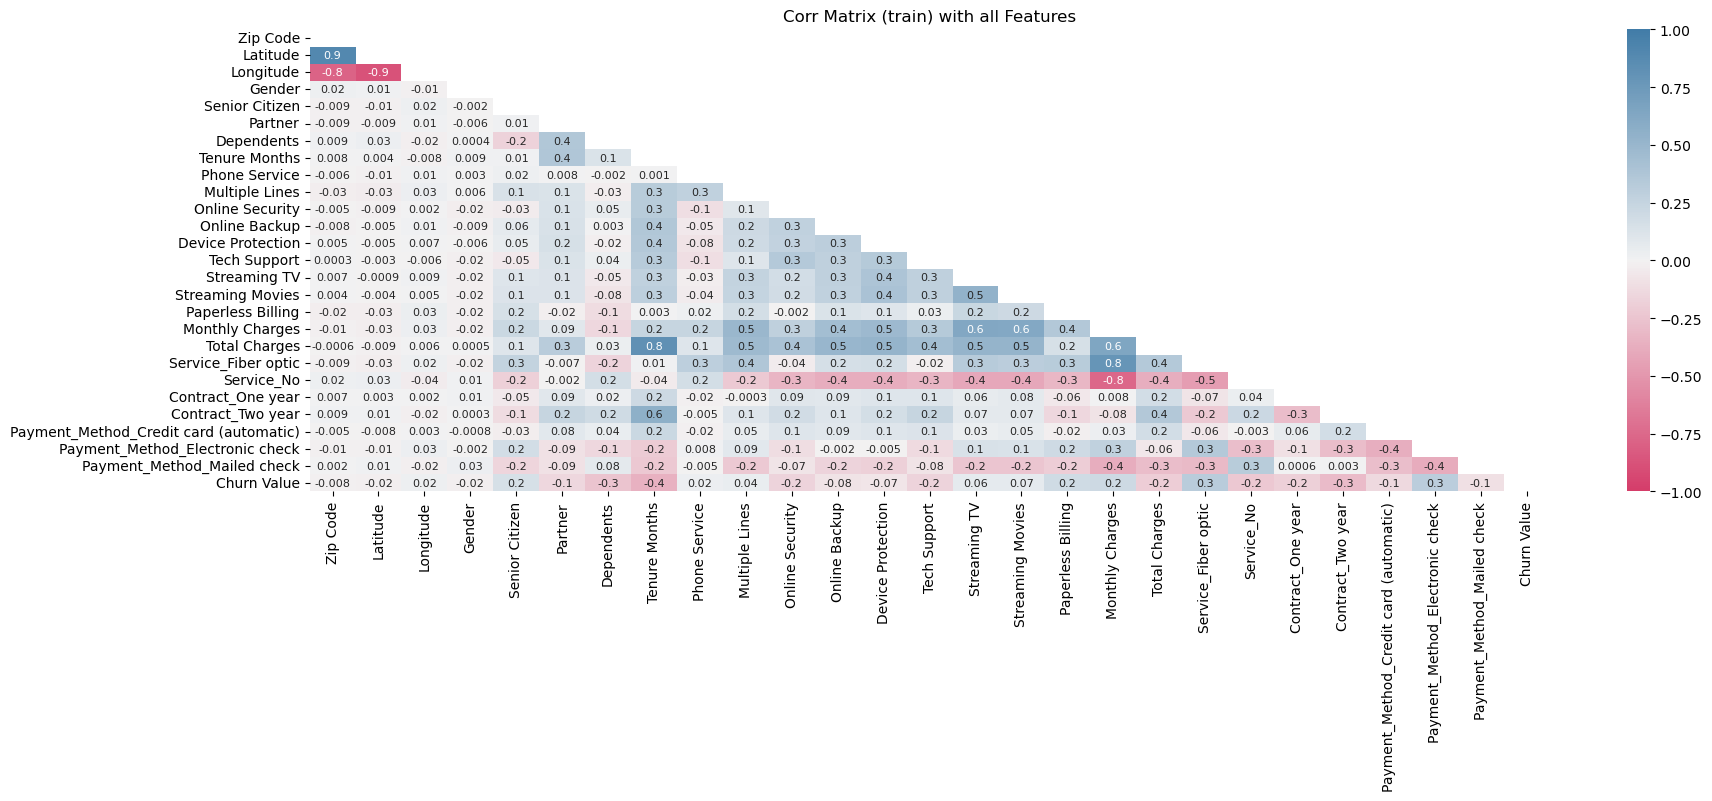

In [37]:
## Create a dataframe of the whole cleaned training set

clean_training_set = pd.concat([X_train_fe, y_train], axis=1)

# check a correlation heatmap involving all of the "new"/encoded features...

plt.figure(figsize=(20, 6))

sns.heatmap(clean_training_set.corr(numeric_only=True),
            annot=True,
            fmt='.1',
            cmap=sns.diverging_palette(0, 240, as_cmap=True),
            vmin=-1,
            vmax=1,
            mask=np.triu(clean_training_set.corr(numeric_only=True)),
            annot_kws={"size": 8}
)

plt.title('Corr Matrix (train) with all Features')
plt.show()

## Correlation Notes & Observations
* longer tenure -> less likely to leave
* more dependents -> less likely to leave
* online security -> less likely to leave
* tech support -> less likely to leave
* higher monthly charges -> more likely to leave
* total charges = higher -> staying longer -> less likely to leave
* one year / two year less likely to leave vs monthly charges
* electronic check -> more likely to leave
* partner -> more likely to stay -- more stable home situations -> more likely to stay (?)
* senior citizens -> more likely to leave - more time to look for deals (?)